In [1]:
import os
import random
from glob import glob
from warnings import simplefilter

import pandas as pd
import albumentations as A
from IPython.display import Image, display

/home/cjellen/projects/github/lc-14/.venv/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: '2.0.4' (you have '2.0.0'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

#### Configure path parameters and read data files

In [3]:
MIDS_USER = os.getenv("MIDS_USER", None)  # this can be replaced, with e.g. `m25...`

if MIDS_USER is None:
  ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), *['..'] * 1)) 
else:
  ROOT_DIR = f"/home/mids/{MIDS_USER}/Capstone"

IMAGES_DIR = os.path.join(ROOT_DIR, "data", "datasets", "aircraft", "images")
if not os.path.exists(IMAGES_DIR):
  ROOT_DIR = os.path.join(ROOT_DIR, "lc-14")
  IMAGES_DIR = os.path.join(ROOT_DIR, "data", "datasets", "aircraft", "images")

RADOM_SEED = 2020

In [4]:
images = glob(os.path.join(IMAGES_DIR, "*.jpg"))  # get all files with the .jpg extension
labels_fp = os.path.join(ROOT_DIR, "data", "datasets", "aircraft", "annotations.csv")

In [5]:
df_labels = pd.read_csv(labels_fp, converters={'geometry':lambda x:list(eval(x))})  # parse the list of tuples from string literal

#### Load utility functions

In [6]:
os.chdir(ROOT_DIR)

In [7]:
from src.utilities.plotting.visualize_transformation import visualize_transformations

#### Sample an image from the dataset

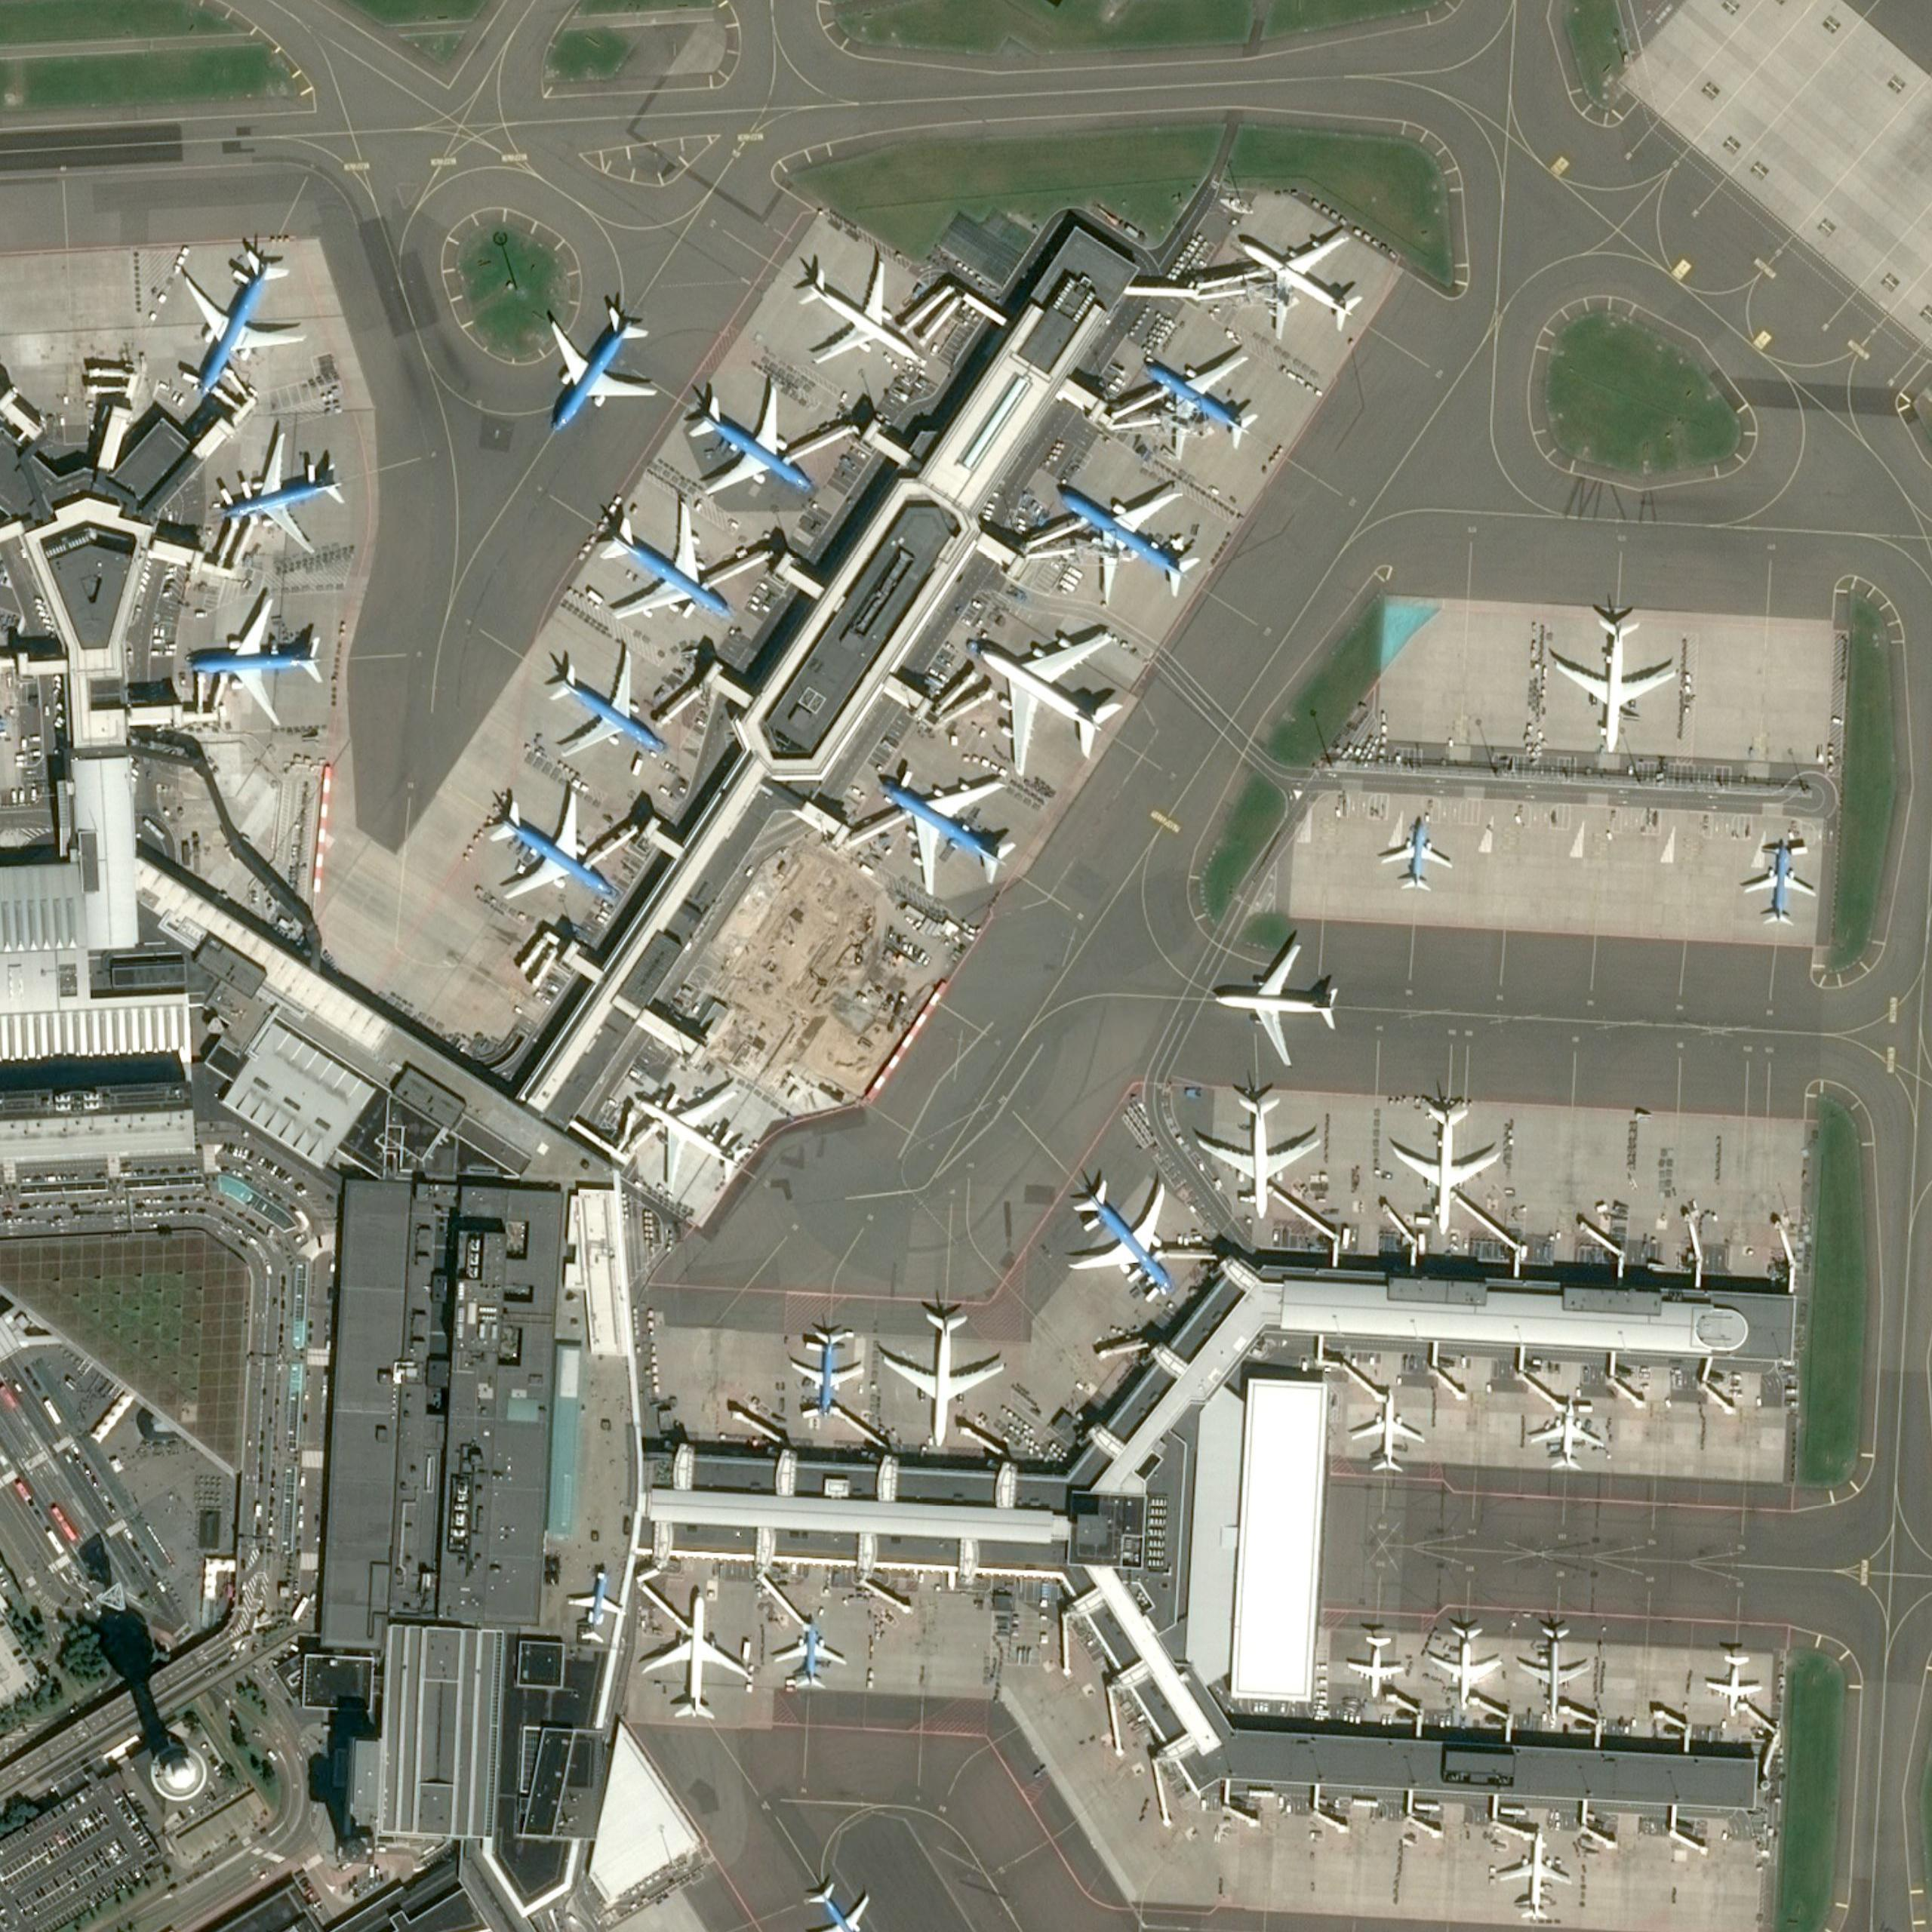

In [8]:
sampled_image_fp = random.choice(images)
display(Image(sampled_image_fp))

### Visualize an Albumations Transformations pipeline

We can define an example transformations pipeline, visualizing the selected image at each step of the pipeline.

In [14]:
transformations = A.Compose([
  A.Resize(256, 256),  # This transform resizes each image before subsequent processing
  A.HorizontalFlip(0.5),
  A.SafeRotate(limit=30, p=0.5),
  A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # This transformation normalizes from standard RGB to grayscale
])


Now that we have an image and a sequence of transformations, we can visualize the transformations pipeline.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


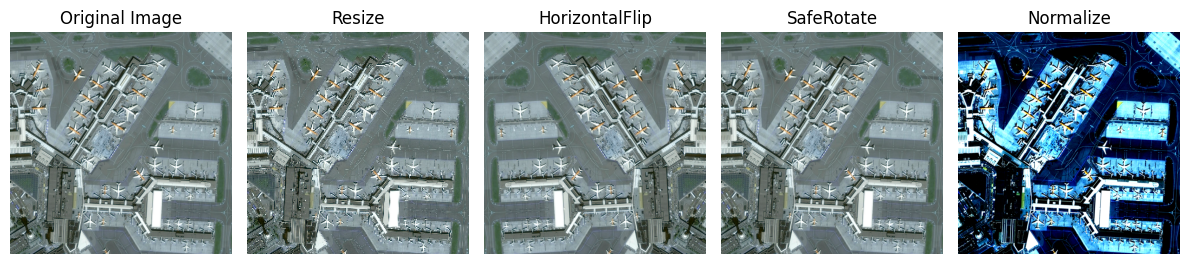

In [15]:
visualize_transformations(
  image_filepath=sampled_image_fp,
  transform=transformations,
)